### Preprocessing of CelebA dataset
### Group10

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import os
import cv2
import glob
from matplotlib import pyplot as plt
from PIL import Image
import tensorflow
from sklearn.model_selection import train_test_split
import random


C:\Users\DELLS\Anaconda3\envs\Facenet\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DELLS\Anaconda3\envs\Facenet\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DELLS\Anaconda3\envs\Facenet\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DELLS\Anaconda3\envs\Facenet\lib\site-packages\tensorflow\

In [2]:
#change the path 
base_dir = os.getcwd()
#data = open("Anno/identity_CelebA.txt", 'r')
#data.read()
base_dir

'C:\\Users\\DELLS\\Desktop\\Face_recognition\\CelebA'

In [3]:
#Read identity text file from Anno folder using panda
df = pd.read_csv('Anno/identity_CelebA.txt', sep=" ", index_col = False, names=('image', 'class'))
df

,image,class
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692
3,000004.jpg,5805
4,000005.jpg,9295
...,...,...
202594,202595.jpg,9761
202595,202596.jpg,7192
202596,202597.jpg,9852
202597,202598.jpg,5570


In [4]:
# create for loop to know length of classes
df = df.sort_values(by=['class'])
print(max(df['class']))
print("--------------------------")
No_of_images= []
for each in range(1, max(df['class']) + 1):
    #print("class" + str(each))
    #print(len(df[df['class'] == each]))
  
    #if(n==2):
     #   print(each)
    
    No_of_images.append(len(df[df['class'] == each]))

10177
--------------------------


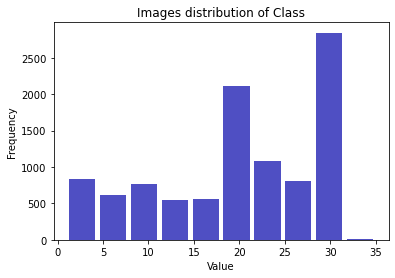

In [7]:
# plot histogram according image distribution of class
plt.hist(x= No_of_images ,color='#0504aa', bins = 10, alpha=0.7, rwidth=0.85)

plt.xlabel('Value')
#plt.xlim(-200,200)
plt.ylabel('Frequency')
plt.title('Images distribution of Class')
plt.show()

In [6]:
# create for loop to take only those classes which have 30 images
val = 30
lst_distribution = []
for idx, value in enumerate(No_of_images):
    #print(idx, value)
    if(value == 30):
        #print(value)
        lst_distribution.append(idx + 1)

In [7]:
# print number of classes having 30 images
df_dist = df[df["class"].isin(lst_distribution)]
df_dist

,image,class
73285,073286.jpg,14
65273,065274.jpg,14
44191,044192.jpg,14
122059,122060.jpg,14
66817,066818.jpg,14
...,...,...
60721,060722.jpg,10176
102060,102061.jpg,10176
98111,098112.jpg,10176
116434,116435.jpg,10176


In [8]:
# Print number of classes
df_dist["class"].unique()

array([   14,    15,    17, ..., 10174, 10175, 10176], dtype=int64)

In [9]:
# print total of images  
len(df_dist)

70290

In [10]:
# function for take input from user
#input_img = input("Enter the number of images?")

In [11]:
# Give direct input to print images
#df_dist = df_dist[:int(input_img)]
df_dist = df_dist[20000:50000]

In [12]:
# length of total inputs by user
len(df_dist)

30000

In [13]:
# for loop to print class accoring images
for each_class in df_dist["class"].unique():
    print(each_class)

3184
3185
3186
3188
3195
3198
3203
3205
3207
3211
3212
3214
3231
3238
3248
3255
3263
3270
3272
3278
3279
3280
3294
3304
3305
3312
3315
3316
3317
3324
3325
3328
3329
3330
3332
3336
3338
3356
3357
3364
3376
3377
3383
3386
3389
3397
3398
3400
3404
3407
3410
3413
3421
3431
3432
3436
3438
3440
3449
3465
3469
3475
3477
3478
3480
3485
3490
3491
3496
3500
3501
3504
3508
3521
3522
3524
3542
3546
3556
3562
3569
3575
3587
3600
3614
3619
3620
3623
3625
3641
3643
3648
3661
3664
3670
3678
3681
3696
3697
3701
3705
3706
3708
3714
3719
3725
3727
3730
3751
3755
3760
3762
3768
3788
3795
3808
3811
3817
3826
3835
3845
3846
3847
3853
3854
3857
3858
3859
3862
3864
3875
3880
3882
3886
3895
3896
3901
3911
3912
3915
3928
3929
3930
3941
3957
3959
3960
3962
3980
3981
3984
3986
3989
3993
3994
4014
4017
4027
4028
4030
4031
4035
4048
4049
4051
4054
4055
4061
4068
4070
4076
4077
4080
4087
4094
4099
4102
4110
4112
4114
4119
4125
4135
4136
4137
4138
4139
4141
4143
4146
4147
4149
4150
4151
4153
4154
4157
4161
4162
4163


In [14]:
# create a function to save the data into training and testing text file under celebA folder
os.chdir(base_dir)

'''if os.path.exists("Training.txt"):
    os.remove("Training.txt")
file_train = open("Training.txt","a")

if os.path.exists("Testing.txt"):
    os.remove("Testing.txt")
file_test = open("Testing.txt","a")'''

if os.path.exists("Training_2.txt"):
    os.remove("Training_2.txt")
file_train = open("Training_2.txt","a")

if os.path.exists("Testing_2.txt"):
    os.remove("Testing_2.txt")
file_test = open("Testing_2.txt","a")

#for each_class in input_class:
for each_class in df_dist["class"].unique():  
    class_df = df_dist.loc[ df_dist['class'] == each_class ]
    list = class_df['image']
    
    training_dataset, test_dataset = train_test_split(list, train_size= 0.7, test_size = 0.3)
        
    print("Train:", training_dataset)
    print("test: ", test_dataset) 
        
    for each in training_dataset:
            file_train.write("CelebA" + "/" + "img_align_celeba" + "/" + each +  " " + str(each_class)  + "\n")
            #file_train.write("img_align_celeba" + "/" + each + "\n")

    for each in test_dataset:
            file_test.write("CelebA" + "/" + "img_align_celeba" + "/" + each +   " " + str(each_class)   + "\n")
            #file_test.write("img_align_celeba" + "/" + each + "\n")
    
    
file_train.close()
file_test.close()

Train: 154715    154716.jpg
68090     068091.jpg
106865    106866.jpg
94190     094191.jpg
121247    121248.jpg
156597    156598.jpg
117975    117976.jpg
Name: image, dtype: object
test:  1952      001953.jpg
42607     042608.jpg
144150    144151.jpg
Name: image, dtype: object
Train: 24621     024622.jpg
31823     031824.jpg
56676     056677.jpg
103563    103564.jpg
51086     051087.jpg
5349      005350.jpg
97945     097946.jpg
50228     050229.jpg
74504     074505.jpg
133914    133915.jpg
133485    133486.jpg
94755     094756.jpg
47162     047163.jpg
147093    147094.jpg
74009     074010.jpg
116043    116044.jpg
68701     068702.jpg
115312    115313.jpg
62584     062585.jpg
19342     019343.jpg
7797      007798.jpg
Name: image, dtype: object
test:  63294     063295.jpg
5695      005696.jpg
62079     062080.jpg
137695    137696.jpg
15063     015064.jpg
105867    105868.jpg
129497    129498.jpg
101788    101789.jpg
152377    152378.jpg
Name: image, dtype: object
Train: 43084     043085.

Train: 21157     021158.jpg
15375     015376.jpg
68766     068767.jpg
153055    153056.jpg
70155     070156.jpg
63115     063116.jpg
92861     092862.jpg
102618    102619.jpg
86252     086253.jpg
58622     058623.jpg
22413     022414.jpg
129203    129204.jpg
60695     060696.jpg
39989     039990.jpg
49408     049409.jpg
144870    144871.jpg
83400     083401.jpg
58992     058993.jpg
50062     050063.jpg
45205     045206.jpg
85153     085154.jpg
Name: image, dtype: object
test:  93120     093121.jpg
24978     024979.jpg
150545    150546.jpg
4561      004562.jpg
45399     045400.jpg
29071     029072.jpg
45701     045702.jpg
153605    153606.jpg
25101     025102.jpg
Name: image, dtype: object
Train: 56621     056622.jpg
26020     026021.jpg
156577    156578.jpg
59216     059217.jpg
103760    103761.jpg
47308     047309.jpg
71683     071684.jpg
10143     010144.jpg
85316     085317.jpg
57379     057380.jpg
84158     084159.jpg
97894     097895.jpg
71722     071723.jpg
143784    143785.jpg
6

Train: 50584     050585.jpg
151841    151842.jpg
42377     042378.jpg
8237      008238.jpg
153414    153415.jpg
13236     013237.jpg
72903     072904.jpg
120992    120993.jpg
43689     043690.jpg
147023    147024.jpg
30911     030912.jpg
78680     078681.jpg
76767     076768.jpg
37954     037955.jpg
74436     074437.jpg
30285     030286.jpg
55092     055093.jpg
147629    147630.jpg
161218    161219.jpg
20809     020810.jpg
142953    142954.jpg
Name: image, dtype: object
test:  108268    108269.jpg
50609     050610.jpg
47406     047407.jpg
116503    116504.jpg
83539     083540.jpg
48062     048063.jpg
124712    124713.jpg
141145    141146.jpg
5324      005325.jpg
Name: image, dtype: object
Train: 114638    114639.jpg
146658    146659.jpg
111256    111257.jpg
107586    107587.jpg
109257    109258.jpg
161168    161169.jpg
123016    123017.jpg
102439    102440.jpg
28840     028841.jpg
1085      001086.jpg
88200     088201.jpg
156145    156146.jpg
63875     063876.jpg
27530     027531.jpg
3

Train: 43345     043346.jpg
28637     028638.jpg
133490    133491.jpg
56145     056146.jpg
152812    152813.jpg
6498      006499.jpg
154645    154646.jpg
93081     093082.jpg
144919    144920.jpg
98244     098245.jpg
50985     050986.jpg
142090    142091.jpg
20698     020699.jpg
155962    155963.jpg
147761    147762.jpg
29551     029552.jpg
37254     037255.jpg
153185    153186.jpg
106212    106213.jpg
123267    123268.jpg
144890    144891.jpg
Name: image, dtype: object
test:  24263     024264.jpg
18900     018901.jpg
10857     010858.jpg
8775      008776.jpg
73394     073395.jpg
107265    107266.jpg
58688     058689.jpg
131172    131173.jpg
126780    126781.jpg
Name: image, dtype: object
Train: 111917    111918.jpg
155287    155288.jpg
77879     077880.jpg
36548     036549.jpg
68495     068496.jpg
35929     035930.jpg
88953     088954.jpg
152211    152212.jpg
40046     040047.jpg
4530      004531.jpg
24738     024739.jpg
96869     096870.jpg
150821    150822.jpg
4662      004663.jpg
1

Train: 1096      001097.jpg
111666    111667.jpg
53545     053546.jpg
127741    127742.jpg
123447    123448.jpg
33795     033796.jpg
119219    119220.jpg
72745     072746.jpg
45613     045614.jpg
23914     023915.jpg
54249     054250.jpg
124134    124135.jpg
108496    108497.jpg
13131     013132.jpg
84082     084083.jpg
96242     096243.jpg
34936     034937.jpg
50136     050137.jpg
62167     062168.jpg
162051    162052.jpg
39640     039641.jpg
Name: image, dtype: object
test:  72364     072365.jpg
158988    158989.jpg
104501    104502.jpg
108715    108716.jpg
137005    137006.jpg
91345     091346.jpg
160868    160869.jpg
2229      002230.jpg
69716     069717.jpg
Name: image, dtype: object
Train: 166552    166553.jpg
173218    173219.jpg
172714    172715.jpg
179532    179533.jpg
169970    169971.jpg
178646    178647.jpg
170895    170896.jpg
170469    170470.jpg
163895    163896.jpg
180459    180460.jpg
177929    177930.jpg
181749    181750.jpg
170466    170467.jpg
175506    175507.jpg
1

Name: image, dtype: object
test:  92856     092857.jpg
149608    149609.jpg
127655    127656.jpg
54364     054365.jpg
128874    128875.jpg
100062    100063.jpg
31232     031233.jpg
433       000434.jpg
30187     030188.jpg
Name: image, dtype: object
Train: 78958     078959.jpg
6749      006750.jpg
115472    115473.jpg
51121     051122.jpg
48081     048082.jpg
94350     094351.jpg
8895      008896.jpg
51391     051392.jpg
44981     044982.jpg
120105    120106.jpg
17635     017636.jpg
58796     058797.jpg
140937    140938.jpg
123961    123962.jpg
43004     043005.jpg
129077    129078.jpg
7566      007567.jpg
33261     033262.jpg
116736    116737.jpg
99784     099785.jpg
18764     018765.jpg
Name: image, dtype: object
test:  142546    142547.jpg
14453     014454.jpg
115770    115771.jpg
45135     045136.jpg
15029     015030.jpg
36341     036342.jpg
91056     091057.jpg
88223     088224.jpg
75525     075526.jpg
Name: image, dtype: object
Train: 85053     085054.jpg
49572     049573.jpg
161

Train: 30023     030024.jpg
123854    123855.jpg
130543    130544.jpg
71427     071428.jpg
54486     054487.jpg
53507     053508.jpg
63494     063495.jpg
10817     010818.jpg
44540     044541.jpg
110597    110598.jpg
24987     024988.jpg
10275     010276.jpg
51270     051271.jpg
99402     099403.jpg
60296     060297.jpg
98585     098586.jpg
152344    152345.jpg
835       000836.jpg
100302    100303.jpg
67032     067033.jpg
65213     065214.jpg
Name: image, dtype: object
test:  161924    161925.jpg
124716    124717.jpg
31083     031084.jpg
61559     061560.jpg
74830     074831.jpg
76453     076454.jpg
78810     078811.jpg
29199     029200.jpg
28257     028258.jpg
Name: image, dtype: object
Train: 62323     062324.jpg
104594    104595.jpg
55726     055727.jpg
42964     042965.jpg
80240     080241.jpg
46506     046507.jpg
44936     044937.jpg
2723      002724.jpg
85565     085566.jpg
125857    125858.jpg
145918    145919.jpg
162201    162202.jpg
38427     038428.jpg
56372     056373.jpg
9

Name: image, dtype: object
test:  159880    159881.jpg
20272     020273.jpg
119863    119864.jpg
9403      009404.jpg
97280     097281.jpg
47274     047275.jpg
156993    156994.jpg
71082     071083.jpg
56538     056539.jpg
Name: image, dtype: object
Train: 1029      001030.jpg
70328     070329.jpg
94141     094142.jpg
62630     062631.jpg
93285     093286.jpg
101521    101522.jpg
151296    151297.jpg
69520     069521.jpg
158905    158906.jpg
129281    129282.jpg
40451     040452.jpg
113847    113848.jpg
105925    105926.jpg
126441    126442.jpg
109260    109261.jpg
12975     012976.jpg
68016     068017.jpg
69588     069589.jpg
43146     043147.jpg
73885     073886.jpg
118158    118159.jpg
Name: image, dtype: object
test:  59373     059374.jpg
20261     020262.jpg
158918    158919.jpg
113523    113524.jpg
73584     073585.jpg
158405    158406.jpg
39732     039733.jpg
4141      004142.jpg
120383    120384.jpg
Name: image, dtype: object
Train: 105984    105985.jpg
119930    119931.jpg
417

Name: image, dtype: object
test:  95312     095313.jpg
116586    116587.jpg
149033    149034.jpg
47541     047542.jpg
7205      007206.jpg
155231    155232.jpg
161730    161731.jpg
53382     053383.jpg
122312    122313.jpg
Name: image, dtype: object
Train: 176554    176555.jpg
177466    177467.jpg
177977    177978.jpg
178056    178057.jpg
176374    176375.jpg
179296    179297.jpg
175219    175220.jpg
163246    163247.jpg
164341    164342.jpg
165562    165563.jpg
175548    175549.jpg
176203    176204.jpg
176089    176090.jpg
174034    174035.jpg
173103    173104.jpg
172125    172126.jpg
166216    166217.jpg
177159    177160.jpg
169563    169564.jpg
163124    163125.jpg
169989    169990.jpg
Name: image, dtype: object
test:  163269    163270.jpg
166587    166588.jpg
178478    178479.jpg
165384    165385.jpg
162811    162812.jpg
164937    164938.jpg
182031    182032.jpg
167992    167993.jpg
181033    181034.jpg
Name: image, dtype: object
Train: 84133     084134.jpg
99384     099385.jpg
396

Name: image, dtype: object
test:  126857    126858.jpg
112988    112989.jpg
37600     037601.jpg
118719    118720.jpg
30288     030289.jpg
147084    147085.jpg
43727     043728.jpg
13538     013539.jpg
136580    136581.jpg
Name: image, dtype: object
Train: 95748     095749.jpg
110968    110969.jpg
109326    109327.jpg
101198    101199.jpg
115156    115157.jpg
157122    157123.jpg
143555    143556.jpg
133372    133373.jpg
9713      009714.jpg
118866    118867.jpg
127916    127917.jpg
32097     032098.jpg
231       000232.jpg
84318     084319.jpg
67470     067471.jpg
132510    132511.jpg
121849    121850.jpg
162223    162224.jpg
35086     035087.jpg
24345     024346.jpg
17176     017177.jpg
Name: image, dtype: object
test:  116418    116419.jpg
158560    158561.jpg
138096    138097.jpg
120067    120068.jpg
57199     057200.jpg
76297     076298.jpg
25144     025145.jpg
138720    138721.jpg
35944     035945.jpg
Name: image, dtype: object
Train: 50837     050838.jpg
109290    109291.jpg
208

Name: image, dtype: object
test:  18529     018530.jpg
41661     041662.jpg
100046    100047.jpg
120169    120170.jpg
42285     042286.jpg
99200     099201.jpg
61428     061429.jpg
149735    149736.jpg
145319    145320.jpg
Name: image, dtype: object
Train: 179875    179876.jpg
165926    165927.jpg
179867    179868.jpg
164733    164734.jpg
178138    178139.jpg
164084    164085.jpg
170253    170254.jpg
167237    167238.jpg
163775    163776.jpg
173008    173009.jpg
169589    169590.jpg
168107    168108.jpg
166569    166570.jpg
167172    167173.jpg
173019    173020.jpg
168140    168141.jpg
182617    182618.jpg
172696    172697.jpg
169301    169302.jpg
176378    176379.jpg
163358    163359.jpg
Name: image, dtype: object
test:  179139    179140.jpg
171790    171791.jpg
177437    177438.jpg
181075    181076.jpg
182373    182374.jpg
174295    174296.jpg
166745    166746.jpg
181617    181618.jpg
167913    167914.jpg
Name: image, dtype: object
Train: 178670    178671.jpg
178895    178896.jpg
171

Train: 47709     047710.jpg
35023     035024.jpg
18300     018301.jpg
41055     041056.jpg
2139      002140.jpg
104176    104177.jpg
34989     034990.jpg
102405    102406.jpg
68605     068606.jpg
73807     073808.jpg
30004     030005.jpg
134401    134402.jpg
162149    162150.jpg
72020     072021.jpg
62173     062174.jpg
99870     099871.jpg
87062     087063.jpg
117701    117702.jpg
54016     054017.jpg
21743     021744.jpg
101533    101534.jpg
Name: image, dtype: object
test:  101914    101915.jpg
98578     098579.jpg
122309    122310.jpg
64514     064515.jpg
54070     054071.jpg
152483    152484.jpg
93339     093340.jpg
74567     074568.jpg
36041     036042.jpg
Name: image, dtype: object
Train: 178645    178646.jpg
181844    181845.jpg
175365    175366.jpg
176692    176693.jpg
168949    168950.jpg
172357    172358.jpg
175275    175276.jpg
177718    177719.jpg
172471    172472.jpg
179067    179068.jpg
168206    168207.jpg
179267    179268.jpg
164154    164155.jpg
172596    172597.jpg
1

Name: image, dtype: object
test:  167953    167954.jpg
180529    180530.jpg
162784    162785.jpg
165958    165959.jpg
168198    168199.jpg
180673    180674.jpg
180626    180627.jpg
173729    173730.jpg
170096    170097.jpg
Name: image, dtype: object
Train: 34710     034711.jpg
156332    156333.jpg
116559    116560.jpg
68904     068905.jpg
6893      006894.jpg
49117     049118.jpg
93677     093678.jpg
151762    151763.jpg
81998     081999.jpg
52219     052220.jpg
99190     099191.jpg
30886     030887.jpg
37569     037570.jpg
19045     019046.jpg
98617     098618.jpg
23336     023337.jpg
100096    100097.jpg
96414     096415.jpg
58737     058738.jpg
68100     068101.jpg
148554    148555.jpg
Name: image, dtype: object
test:  51924     051925.jpg
20861     020862.jpg
41519     041520.jpg
34309     034310.jpg
120702    120703.jpg
142114    142115.jpg
101313    101314.jpg
101640    101641.jpg
46540     046541.jpg
Name: image, dtype: object
Train: 158539    158540.jpg
138696    138697.jpg
379

Train: 151992    151993.jpg
158498    158499.jpg
154310    154311.jpg
149613    149614.jpg
28346     028347.jpg
122862    122863.jpg
143244    143245.jpg
155050    155051.jpg
95949     095950.jpg
128379    128380.jpg
159607    159608.jpg
88537     088538.jpg
101694    101695.jpg
110270    110271.jpg
82859     082860.jpg
79696     079697.jpg
86466     086467.jpg
125324    125325.jpg
155944    155945.jpg
110172    110173.jpg
83681     083682.jpg
Name: image, dtype: object
test:  71510     071511.jpg
33739     033740.jpg
18236     018237.jpg
120976    120977.jpg
155719    155720.jpg
55014     055015.jpg
100782    100783.jpg
76517     076518.jpg
121466    121467.jpg
Name: image, dtype: object
Train: 158132    158133.jpg
146098    146099.jpg
11595     011596.jpg
82775     082776.jpg
100154    100155.jpg
104277    104278.jpg
61688     061689.jpg
132702    132703.jpg
126594    126595.jpg
86125     086126.jpg
130029    130030.jpg
130036    130037.jpg
11572     011573.jpg
28816     028817.jpg
6

Train: 21488     021489.jpg
39025     039026.jpg
10072     010073.jpg
109628    109629.jpg
162159    162160.jpg
112719    112720.jpg
109913    109914.jpg
75334     075335.jpg
79111     079112.jpg
155326    155327.jpg
63571     063572.jpg
10693     010694.jpg
92158     092159.jpg
17980     017981.jpg
99791     099792.jpg
93983     093984.jpg
42472     042473.jpg
155134    155135.jpg
43466     043467.jpg
154409    154410.jpg
29784     029785.jpg
Name: image, dtype: object
test:  86751     086752.jpg
135234    135235.jpg
119363    119364.jpg
130951    130952.jpg
24622     024623.jpg
72746     072747.jpg
70719     070720.jpg
27955     027956.jpg
136599    136600.jpg
Name: image, dtype: object
Train: 74446     074447.jpg
47208     047209.jpg
115569    115570.jpg
2537      002538.jpg
10712     010713.jpg
115162    115163.jpg
159800    159801.jpg
54949     054950.jpg
77177     077178.jpg
78673     078674.jpg
152043    152044.jpg
80094     080095.jpg
89470     089471.jpg
46009     046010.jpg
3

Name: image, dtype: object
Train: 73359     073360.jpg
141781    141782.jpg
111527    111528.jpg
120518    120519.jpg
107808    107809.jpg
50624     050625.jpg
140950    140951.jpg
124834    124835.jpg
24330     024331.jpg
80756     080757.jpg
71303     071304.jpg
41989     041990.jpg
51071     051072.jpg
160873    160874.jpg
18541     018542.jpg
51862     051863.jpg
102412    102413.jpg
112006    112007.jpg
125422    125423.jpg
99662     099663.jpg
90517     090518.jpg
Name: image, dtype: object
test:  136677    136678.jpg
96362     096363.jpg
147357    147358.jpg
100737    100738.jpg
121157    121158.jpg
6351      006352.jpg
56549     056550.jpg
131425    131426.jpg
133219    133220.jpg
Name: image, dtype: object
Train: 131993    131994.jpg
21521     021522.jpg
136188    136189.jpg
13430     013431.jpg
16668     016669.jpg
106989    106990.jpg
90212     090213.jpg
139298    139299.jpg
109759    109760.jpg
129933    129934.jpg
70738     070739.jpg
35540     035541.jpg
115935    115936

Name: image, dtype: object
Train: 145036    145037.jpg
56674     056675.jpg
39713     039714.jpg
7618      007619.jpg
4075      004076.jpg
135288    135289.jpg
134267    134268.jpg
32516     032517.jpg
53442     053443.jpg
153048    153049.jpg
151376    151377.jpg
81048     081049.jpg
40316     040317.jpg
70311     070312.jpg
76123     076124.jpg
94459     094460.jpg
7459      007460.jpg
95907     095908.jpg
92923     092924.jpg
126083    126084.jpg
82926     082927.jpg
Name: image, dtype: object
test:  53760     053761.jpg
90155     090156.jpg
112217    112218.jpg
149886    149887.jpg
29312     029313.jpg
37411     037412.jpg
96802     096803.jpg
3738      003739.jpg
16369     016370.jpg
Name: image, dtype: object
Train: 62134     062135.jpg
84171     084172.jpg
45671     045672.jpg
73184     073185.jpg
81561     081562.jpg
147873    147874.jpg
137597    137598.jpg
103268    103269.jpg
81507     081508.jpg
36555     036556.jpg
146304    146305.jpg
3104      003105.jpg
44299     044300

Train: 7019      007020.jpg
41095     041096.jpg
120822    120823.jpg
147749    147750.jpg
106227    106228.jpg
12109     012110.jpg
44982     044983.jpg
85963     085964.jpg
160546    160547.jpg
83482     083483.jpg
129610    129611.jpg
16188     016189.jpg
7474      007475.jpg
53695     053696.jpg
86726     086727.jpg
82314     082315.jpg
50982     050983.jpg
45319     045320.jpg
95226     095227.jpg
102259    102260.jpg
9849      009850.jpg
Name: image, dtype: object
test:  129212    129213.jpg
25212     025213.jpg
112558    112559.jpg
12628     012629.jpg
41787     041788.jpg
135072    135073.jpg
34785     034786.jpg
140263    140264.jpg
100233    100234.jpg
Name: image, dtype: object
Train: 181095    181096.jpg
178475    178476.jpg
177767    177768.jpg
175132    175133.jpg
181576    181577.jpg
163816    163817.jpg
163991    163992.jpg
163295    163296.jpg
169189    169190.jpg
180387    180388.jpg
168738    168739.jpg
166222    166223.jpg
172180    172181.jpg
163025    163026.jpg
1

Train: 155966    155967.jpg
17717     017718.jpg
35349     035350.jpg
114683    114684.jpg
155330    155331.jpg
11598     011599.jpg
85578     085579.jpg
99039     099040.jpg
3953      003954.jpg
148882    148883.jpg
93070     093071.jpg
71410     071411.jpg
27309     027310.jpg
65077     065078.jpg
2797      002798.jpg
91835     091836.jpg
61515     061516.jpg
8517      008518.jpg
50044     050045.jpg
44670     044671.jpg
92141     092142.jpg
Name: image, dtype: object
test:  83187     083188.jpg
94081     094082.jpg
9743      009744.jpg
37165     037166.jpg
17140     017141.jpg
122715    122716.jpg
53146     053147.jpg
161636    161637.jpg
136322    136323.jpg
Name: image, dtype: object
Train: 60904     060905.jpg
66614     066615.jpg
116304    116305.jpg
25852     025853.jpg
121109    121110.jpg
47016     047017.jpg
4479      004480.jpg
115113    115114.jpg
99471     099472.jpg
21009     021010.jpg
146798    146799.jpg
59580     059581.jpg
106379    106380.jpg
117887    117888.jpg
1

Train: 69779     069780.jpg
80934     080935.jpg
95849     095850.jpg
15662     015663.jpg
153980    153981.jpg
91498     091499.jpg
70110     070111.jpg
36847     036848.jpg
4762      004763.jpg
157274    157275.jpg
108785    108786.jpg
71558     071559.jpg
12592     012593.jpg
138396    138397.jpg
131391    131392.jpg
44740     044741.jpg
65598     065599.jpg
82252     082253.jpg
49133     049134.jpg
41640     041641.jpg
52649     052650.jpg
Name: image, dtype: object
test:  101525    101526.jpg
116361    116362.jpg
123004    123005.jpg
144410    144411.jpg
97805     097806.jpg
31498     031499.jpg
151133    151134.jpg
145730    145731.jpg
113965    113966.jpg
Name: image, dtype: object
Train: 180943    180944.jpg
165953    165954.jpg
172861    172862.jpg
166450    166451.jpg
178269    178270.jpg
178092    178093.jpg
171647    171648.jpg
163362    163363.jpg
180119    180120.jpg
176180    176181.jpg
169203    169204.jpg
174510    174511.jpg
175331    175332.jpg
180074    180075.jpg
1

Train: 112572    112573.jpg
29825     029826.jpg
102652    102653.jpg
109889    109890.jpg
158212    158213.jpg
56569     056570.jpg
127975    127976.jpg
121496    121497.jpg
143837    143838.jpg
73622     073623.jpg
54484     054485.jpg
8322      008323.jpg
61020     061021.jpg
143823    143824.jpg
108102    108103.jpg
39799     039800.jpg
5772      005773.jpg
119947    119948.jpg
27808     027809.jpg
114061    114062.jpg
38799     038800.jpg
Name: image, dtype: object
test:  108073    108074.jpg
65553     065554.jpg
36147     036148.jpg
131492    131493.jpg
134460    134461.jpg
85361     085362.jpg
88430     088431.jpg
19721     019722.jpg
157422    157423.jpg
Name: image, dtype: object
Train: 112073    112074.jpg
135934    135935.jpg
89979     089980.jpg
134523    134524.jpg
123080    123081.jpg
68038     068039.jpg
77371     077372.jpg
83893     083894.jpg
67790     067791.jpg
62324     062325.jpg
84545     084546.jpg
90229     090230.jpg
77612     077613.jpg
106964    106965.jpg
1

Train: 8578      008579.jpg
95361     095362.jpg
78060     078061.jpg
149810    149811.jpg
146362    146363.jpg
117560    117561.jpg
84548     084549.jpg
90959     090960.jpg
93038     093039.jpg
60668     060669.jpg
47452     047453.jpg
102368    102369.jpg
150983    150984.jpg
136257    136258.jpg
139194    139195.jpg
126085    126086.jpg
136587    136588.jpg
126369    126370.jpg
95333     095334.jpg
72537     072538.jpg
64425     064426.jpg
Name: image, dtype: object
test:  27690     027691.jpg
156020    156021.jpg
72997     072998.jpg
27038     027039.jpg
105295    105296.jpg
119081    119082.jpg
77070     077071.jpg
32217     032218.jpg
65764     065765.jpg
Name: image, dtype: object
Train: 98550     098551.jpg
77405     077406.jpg
19293     019294.jpg
2074      002075.jpg
15921     015922.jpg
59398     059399.jpg
15085     015086.jpg
150905    150906.jpg
159695    159696.jpg
78404     078405.jpg
118367    118368.jpg
105592    105593.jpg
31092     031093.jpg
118173    118174.jpg
2

Train: 141668    141669.jpg
30823     030824.jpg
68235     068236.jpg
129614    129615.jpg
24745     024746.jpg
125589    125590.jpg
150566    150567.jpg
57849     057850.jpg
108974    108975.jpg
12971     012972.jpg
152496    152497.jpg
148186    148187.jpg
83485     083486.jpg
142637    142638.jpg
28854     028855.jpg
107406    107407.jpg
117146    117147.jpg
5859      005860.jpg
99892     099893.jpg
147069    147070.jpg
107275    107276.jpg
Name: image, dtype: object
test:  5616      005617.jpg
2780      002781.jpg
39334     039335.jpg
10395     010396.jpg
27675     027676.jpg
57429     057430.jpg
68058     068059.jpg
129583    129584.jpg
199       000200.jpg
Name: image, dtype: object
Train: 126295    126296.jpg
146262    146263.jpg
12033     012034.jpg
132228    132229.jpg
75438     075439.jpg
92953     092954.jpg
33334     033335.jpg
122383    122384.jpg
117955    117956.jpg
23732     023733.jpg
119998    119999.jpg
161529    161530.jpg
37649     037650.jpg
17347     017348.jpg
1

Train: 61841     061842.jpg
38108     038109.jpg
150936    150937.jpg
23263     023264.jpg
27380     027381.jpg
162472    162473.jpg
14417     014418.jpg
157123    157124.jpg
109812    109813.jpg
5191      005192.jpg
149127    149128.jpg
56699     056700.jpg
161831    161832.jpg
16539     016540.jpg
152002    152003.jpg
17094     017095.jpg
114376    114377.jpg
118437    118438.jpg
74437     074438.jpg
162608    162609.jpg
101374    101375.jpg
Name: image, dtype: object
test:  22547     022548.jpg
157058    157059.jpg
90970     090971.jpg
13394     013395.jpg
50766     050767.jpg
77402     077403.jpg
85351     085352.jpg
33428     033429.jpg
40039     040040.jpg
Name: image, dtype: object
Train: 63777     063778.jpg
29532     029533.jpg
31450     031451.jpg
54494     054495.jpg
49960     049961.jpg
39698     039699.jpg
140518    140519.jpg
69777     069778.jpg
23242     023243.jpg
160643    160644.jpg
94997     094998.jpg
86373     086374.jpg
55314     055315.jpg
145038    145039.jpg
1

Name: image, dtype: object
Train: 121060    121061.jpg
37788     037789.jpg
42894     042895.jpg
16246     016247.jpg
152706    152707.jpg
74066     074067.jpg
75072     075073.jpg
30357     030358.jpg
71076     071077.jpg
141833    141834.jpg
109499    109500.jpg
107431    107432.jpg
43325     043326.jpg
159287    159288.jpg
91390     091391.jpg
23557     023558.jpg
161149    161150.jpg
15051     015052.jpg
27806     027807.jpg
62686     062687.jpg
87371     087372.jpg
Name: image, dtype: object
test:  127627    127628.jpg
60866     060867.jpg
27208     027209.jpg
60054     060055.jpg
67882     067883.jpg
133723    133724.jpg
81564     081565.jpg
69532     069533.jpg
55322     055323.jpg
Name: image, dtype: object
Train: 188853    188854.jpg
195419    195420.jpg
197995    197996.jpg
182868    182869.jpg
192180    192181.jpg
197742    197743.jpg
185234    185235.jpg
192896    192897.jpg
191776    191777.jpg
191474    191475.jpg
200929    200930.jpg
185396    185397.jpg
183103    183104

Train: 35042     035043.jpg
106604    106605.jpg
118648    118649.jpg
28163     028164.jpg
31500     031501.jpg
51099     051100.jpg
15326     015327.jpg
60355     060356.jpg
81323     081324.jpg
109527    109528.jpg
1347      001348.jpg
22080     022081.jpg
28623     028624.jpg
2808      002809.jpg
9838      009839.jpg
149349    149350.jpg
117002    117003.jpg
156770    156771.jpg
147032    147033.jpg
34563     034564.jpg
84567     084568.jpg
Name: image, dtype: object
test:  136646    136647.jpg
103911    103912.jpg
77766     077767.jpg
21548     021549.jpg
17410     017411.jpg
36348     036349.jpg
136405    136406.jpg
15901     015902.jpg
32313     032314.jpg
Name: image, dtype: object
Train: 194010    194011.jpg
192590    192591.jpg
191291    191292.jpg
182809    182810.jpg
192050    192051.jpg
199077    199078.jpg
192460    192461.jpg
201638    201639.jpg
186504    186505.jpg
198649    198650.jpg
194697    194698.jpg
183997    183998.jpg
189047    189048.jpg
197920    197921.jpg
1

Train: 108828    108829.jpg
18533     018534.jpg
20150     020151.jpg
44164     044165.jpg
29875     029876.jpg
78108     078109.jpg
75059     075060.jpg
105560    105561.jpg
27581     027582.jpg
108852    108853.jpg
92737     092738.jpg
30625     030626.jpg
152834    152835.jpg
139140    139141.jpg
123924    123925.jpg
135947    135948.jpg
108588    108589.jpg
90440     090441.jpg
46411     046412.jpg
112150    112151.jpg
151096    151097.jpg
Name: image, dtype: object
test:  86580     086581.jpg
79337     079338.jpg
24713     024714.jpg
49304     049305.jpg
75673     075674.jpg
133622    133623.jpg
42345     042346.jpg
130818    130819.jpg
13228     013229.jpg
Name: image, dtype: object
Train: 193142    193143.jpg
188531    188532.jpg
185237    185238.jpg
194845    194846.jpg
183744    183745.jpg
197228    197229.jpg
200032    200033.jpg
183933    183934.jpg
199443    199444.jpg
187334    187335.jpg
200619    200620.jpg
198924    198925.jpg
194927    194928.jpg
194685    194686.jpg
2

Name: image, dtype: object
Train: 199263    199264.jpg
182757    182758.jpg
196267    196268.jpg
194575    194576.jpg
193214    193215.jpg
193504    193505.jpg
200587    200588.jpg
202050    202051.jpg
197875    197876.jpg
188166    188167.jpg
195516    195517.jpg
198616    198617.jpg
184126    184127.jpg
202062    202063.jpg
202571    202572.jpg
192882    192883.jpg
184147    184148.jpg
184052    184053.jpg
183413    183414.jpg
197945    197946.jpg
184535    184536.jpg
Name: image, dtype: object
test:  197869    197870.jpg
201271    201272.jpg
199428    199429.jpg
183722    183723.jpg
185436    185437.jpg
201026    201027.jpg
197367    197368.jpg
182942    182943.jpg
188176    188177.jpg
Name: image, dtype: object
Train: 118757    118758.jpg
77508     077509.jpg
70575     070576.jpg
21010     021011.jpg
72765     072766.jpg
78130     078131.jpg
88292     088293.jpg
74321     074322.jpg
107979    107980.jpg
2902      002903.jpg
140064    140065.jpg
122553    122554.jpg
137729    137730

Train: 33014     033015.jpg
6905      006906.jpg
25644     025645.jpg
157130    157131.jpg
93538     093539.jpg
140527    140528.jpg
146348    146349.jpg
141519    141520.jpg
145279    145280.jpg
121483    121484.jpg
107706    107707.jpg
148413    148414.jpg
141551    141552.jpg
41567     041568.jpg
95606     095607.jpg
108508    108509.jpg
23879     023880.jpg
111518    111519.jpg
68628     068629.jpg
152718    152719.jpg
73215     073216.jpg
Name: image, dtype: object
test:  55753     055754.jpg
129289    129290.jpg
22169     022170.jpg
106644    106645.jpg
18841     018842.jpg
18054     018055.jpg
85320     085321.jpg
430       000431.jpg
98838     098839.jpg
Name: image, dtype: object
Train: 45087     045088.jpg
37874     037875.jpg
152915    152916.jpg
77080     077081.jpg
73060     073061.jpg
160484    160485.jpg
90253     090254.jpg
101007    101008.jpg
118355    118356.jpg
121032    121033.jpg
130999    131000.jpg
145907    145908.jpg
72867     072868.jpg
14106     014107.jpg
6

Name: image, dtype: object
test:  21856     021857.jpg
125478    125479.jpg
22447     022448.jpg
13201     013202.jpg
96566     096567.jpg
17647     017648.jpg
103651    103652.jpg
126477    126478.jpg
59838     059839.jpg
Name: image, dtype: object
Train: 29055     029056.jpg
68948     068949.jpg
11916     011917.jpg
19794     019795.jpg
122202    122203.jpg
33856     033857.jpg
151257    151258.jpg
120011    120012.jpg
93932     093933.jpg
115493    115494.jpg
46147     046148.jpg
18750     018751.jpg
33134     033135.jpg
103712    103713.jpg
131404    131405.jpg
117162    117163.jpg
79012     079013.jpg
162624    162625.jpg
46243     046244.jpg
19154     019155.jpg
12125     012126.jpg
Name: image, dtype: object
test:  8673      008674.jpg
21039     021040.jpg
26541     026542.jpg
109155    109156.jpg
67969     067970.jpg
102071    102072.jpg
65328     065329.jpg
146551    146552.jpg
30723     030724.jpg
Name: image, dtype: object
Train: 185072    185073.jpg
188324    188325.jpg
182

Train: 78681     078682.jpg
106852    106853.jpg
10124     010125.jpg
103666    103667.jpg
141684    141685.jpg
106407    106408.jpg
6967      006968.jpg
48439     048440.jpg
157275    157276.jpg
85789     085790.jpg
83829     083830.jpg
134869    134870.jpg
31837     031838.jpg
76391     076392.jpg
22836     022837.jpg
31830     031831.jpg
66215     066216.jpg
51916     051917.jpg
74863     074864.jpg
157367    157368.jpg
70562     070563.jpg
Name: image, dtype: object
test:  137779    137780.jpg
24786     024787.jpg
123097    123098.jpg
128018    128019.jpg
59159     059160.jpg
143655    143656.jpg
78776     078777.jpg
147732    147733.jpg
55841     055842.jpg
Name: image, dtype: object
Train: 149695    149696.jpg
94124     094125.jpg
35260     035261.jpg
39761     039762.jpg
79634     079635.jpg
5254      005255.jpg
161011    161012.jpg
10073     010074.jpg
56977     056978.jpg
13210     013211.jpg
130974    130975.jpg
159882    159883.jpg
94409     094410.jpg
30155     030156.jpg
1

Name: image, dtype: object
test:  192217    192218.jpg
189450    189451.jpg
183501    183502.jpg
193892    193893.jpg
184416    184417.jpg
196550    196551.jpg
187878    187879.jpg
186213    186214.jpg
190326    190327.jpg
Name: image, dtype: object
Train: 83258     083259.jpg
61852     061853.jpg
114873    114874.jpg
9868      009869.jpg
150080    150081.jpg
140419    140420.jpg
119421    119422.jpg
56171     056172.jpg
94549     094550.jpg
38876     038877.jpg
122809    122810.jpg
42553     042554.jpg
107101    107102.jpg
149586    149587.jpg
109771    109772.jpg
26343     026344.jpg
104830    104831.jpg
12737     012738.jpg
81820     081821.jpg
78082     078083.jpg
52403     052404.jpg
Name: image, dtype: object
test:  129538    129539.jpg
65987     065988.jpg
73642     073643.jpg
67119     067120.jpg
20445     020446.jpg
81318     081319.jpg
48114     048115.jpg
2082      002083.jpg
146308    146309.jpg
Name: image, dtype: object
Train: 145107    145108.jpg
109575    109576.jpg
655

Train: 47773     047774.jpg
26291     026292.jpg
151957    151958.jpg
43320     043321.jpg
123241    123242.jpg
31433     031434.jpg
59452     059453.jpg
101493    101494.jpg
30703     030704.jpg
160029    160030.jpg
82198     082199.jpg
137814    137815.jpg
49772     049773.jpg
78576     078577.jpg
17227     017228.jpg
143958    143959.jpg
136143    136144.jpg
69938     069939.jpg
123150    123151.jpg
128766    128767.jpg
146196    146197.jpg
Name: image, dtype: object
test:  75383     075384.jpg
60351     060352.jpg
112677    112678.jpg
120758    120759.jpg
64882     064883.jpg
17724     017725.jpg
156462    156463.jpg
45286     045287.jpg
142898    142899.jpg
Name: image, dtype: object
Train: 46006     046007.jpg
152609    152610.jpg
84743     084744.jpg
128998    128999.jpg
120390    120391.jpg
6337      006338.jpg
37434     037435.jpg
131370    131371.jpg
49174     049175.jpg
18534     018535.jpg
140080    140081.jpg
31963     031964.jpg
66887     066888.jpg
33055     033056.jpg
6

Train: 31743     031744.jpg
391       000392.jpg
41967     041968.jpg
22924     022925.jpg
97248     097249.jpg
76495     076496.jpg
65299     065300.jpg
15841     015842.jpg
42348     042349.jpg
134594    134595.jpg
124126    124127.jpg
146157    146158.jpg
48112     048113.jpg
160294    160295.jpg
47953     047954.jpg
76083     076084.jpg
129543    129544.jpg
46057     046058.jpg
33472     033473.jpg
18370     018371.jpg
99875     099876.jpg
Name: image, dtype: object
test:  80159     080160.jpg
48724     048725.jpg
42333     042334.jpg
124812    124813.jpg
152717    152718.jpg
34781     034782.jpg
73153     073154.jpg
36930     036931.jpg
143656    143657.jpg
Name: image, dtype: object
Train: 48791     048792.jpg
124478    124479.jpg
28476     028477.jpg
64505     064506.jpg
128200    128201.jpg
70132     070133.jpg
123247    123248.jpg
74868     074869.jpg
23422     023423.jpg
114235    114236.jpg
149043    149044.jpg
28941     028942.jpg
86312     086313.jpg
60486     060487.jpg
9

Name: image, dtype: object
test:  4830      004831.jpg
94492     094493.jpg
54117     054118.jpg
15884     015885.jpg
78101     078102.jpg
81933     081934.jpg
103495    103496.jpg
22417     022418.jpg
65519     065520.jpg
Name: image, dtype: object
Train: 107083    107084.jpg
127946    127947.jpg
113625    113626.jpg
145235    145236.jpg
70121     070122.jpg
59694     059695.jpg
77253     077254.jpg
121802    121803.jpg
135219    135220.jpg
151089    151090.jpg
50938     050939.jpg
142152    142153.jpg
131133    131134.jpg
34697     034698.jpg
44691     044692.jpg
91015     091016.jpg
132295    132296.jpg
152957    152958.jpg
83592     083593.jpg
118877    118878.jpg
138673    138674.jpg
Name: image, dtype: object
test:  44659     044660.jpg
159108    159109.jpg
34553     034554.jpg
125866    125867.jpg
114584    114585.jpg
102264    102265.jpg
39508     039509.jpg
79341     079342.jpg
93948     093949.jpg
Name: image, dtype: object
Train: 90420     090421.jpg
7703      007704.jpg
125

Train: 116104    116105.jpg
145305    145306.jpg
43742     043743.jpg
87187     087188.jpg
67679     067680.jpg
14393     014394.jpg
140764    140765.jpg
136525    136526.jpg
19555     019556.jpg
1217      001218.jpg
150659    150660.jpg
110558    110559.jpg
162355    162356.jpg
72237     072238.jpg
64204     064205.jpg
70051     070052.jpg
116966    116967.jpg
146385    146386.jpg
137605    137606.jpg
65095     065096.jpg
92740     092741.jpg
Name: image, dtype: object
test:  107879    107880.jpg
39078     039079.jpg
136492    136493.jpg
77520     077521.jpg
147469    147470.jpg
128372    128373.jpg
155097    155098.jpg
23113     023114.jpg
10750     010751.jpg
Name: image, dtype: object
Train: 12843     012844.jpg
126874    126875.jpg
106589    106590.jpg
48231     048232.jpg
104682    104683.jpg
89300     089301.jpg
2341      002342.jpg
107046    107047.jpg
84663     084664.jpg
32771     032772.jpg
11160     011161.jpg
154982    154983.jpg
2856      002857.jpg
115202    115203.jpg
6

Train: 130637    130638.jpg
53451     053452.jpg
148907    148908.jpg
40665     040666.jpg
152897    152898.jpg
86053     086054.jpg
104046    104047.jpg
106843    106844.jpg
3361      003362.jpg
157409    157410.jpg
11249     011250.jpg
7890      007891.jpg
13267     013268.jpg
44138     044139.jpg
149726    149727.jpg
48526     048527.jpg
51757     051758.jpg
118606    118607.jpg
135193    135194.jpg
27384     027385.jpg
61892     061893.jpg
Name: image, dtype: object
test:  80576     080577.jpg
138836    138837.jpg
33722     033723.jpg
59810     059811.jpg
17111     017112.jpg
115203    115204.jpg
91703     091704.jpg
148109    148110.jpg
6504      006505.jpg
Name: image, dtype: object
Train: 86533     086534.jpg
126105    126106.jpg
93552     093553.jpg
68749     068750.jpg
100079    100080.jpg
23585     023586.jpg
7061      007062.jpg
117897    117898.jpg
56841     056842.jpg
135376    135377.jpg
125647    125648.jpg
141047    141048.jpg
79138     079139.jpg
135866    135867.jpg
1

test:  45407     045408.jpg
16303     016304.jpg
63466     063467.jpg
132828    132829.jpg
153502    153503.jpg
52857     052858.jpg
95802     095803.jpg
82559     082560.jpg
83952     083953.jpg
Name: image, dtype: object
Train: 197943    197944.jpg
193888    193889.jpg
193912    193913.jpg
193660    193661.jpg
192524    192525.jpg
186638    186639.jpg
194158    194159.jpg
201240    201241.jpg
185471    185472.jpg
199088    199089.jpg
185840    185841.jpg
186185    186186.jpg
193419    193420.jpg
198982    198983.jpg
197304    197305.jpg
190617    190618.jpg
184066    184067.jpg
189516    189517.jpg
186337    186338.jpg
183875    183876.jpg
199452    199453.jpg
Name: image, dtype: object
test:  189443    189444.jpg
183639    183640.jpg
186307    186308.jpg
186637    186638.jpg
191239    191240.jpg
197235    197236.jpg
192700    192701.jpg
191558    191559.jpg
197871    197872.jpg
Name: image, dtype: object
Train: 200170    200171.jpg
187725    187726.jpg
183296    183297.jpg
189140   

Name: image, dtype: object
Train: 90013     090014.jpg
154061    154062.jpg
96555     096556.jpg
95951     095952.jpg
74283     074284.jpg
83852     083853.jpg
122058    122059.jpg
20759     020760.jpg
146174    146175.jpg
39264     039265.jpg
88569     088570.jpg
121349    121350.jpg
133176    133177.jpg
72394     072395.jpg
39671     039672.jpg
29895     029896.jpg
40130     040131.jpg
126555    126556.jpg
89003     089004.jpg
35562     035563.jpg
82241     082242.jpg
Name: image, dtype: object
test:  153829    153830.jpg
126694    126695.jpg
39490     039491.jpg
122915    122916.jpg
2587      002588.jpg
57985     057986.jpg
99569     099570.jpg
70778     070779.jpg
80688     080689.jpg
Name: image, dtype: object
Train: 137042    137043.jpg
4395      004396.jpg
115533    115534.jpg
125089    125090.jpg
22857     022858.jpg
96030     096031.jpg
38377     038378.jpg
148777    148778.jpg
54997     054998.jpg
76531     076532.jpg
88434     088435.jpg
30700     030701.jpg
136071    136072

Train: 43160     043161.jpg
35985     035986.jpg
118824    118825.jpg
19279     019280.jpg
64250     064251.jpg
27698     027699.jpg
120428    120429.jpg
148228    148229.jpg
31697     031698.jpg
118998    118999.jpg
83889     083890.jpg
151423    151424.jpg
38755     038756.jpg
1955      001956.jpg
70342     070343.jpg
113855    113856.jpg
74963     074964.jpg
126381    126382.jpg
41442     041443.jpg
83626     083627.jpg
90811     090812.jpg
Name: image, dtype: object
test:  37756     037757.jpg
83446     083447.jpg
64424     064425.jpg
155212    155213.jpg
127495    127496.jpg
134505    134506.jpg
89698     089699.jpg
137359    137360.jpg
108327    108328.jpg
Name: image, dtype: object
Train: 56958     056959.jpg
144687    144688.jpg
47324     047325.jpg
10233     010234.jpg
92378     092379.jpg
159847    159848.jpg
110926    110927.jpg
104733    104734.jpg
137913    137914.jpg
148134    148135.jpg
40626     040627.jpg
19237     019238.jpg
41518     041519.jpg
141764    141765.jpg
8

Train: 149496    149497.jpg
84040     084041.jpg
162140    162141.jpg
8677      008678.jpg
43646     043647.jpg
65527     065528.jpg
137944    137945.jpg
125618    125619.jpg
105203    105204.jpg
149174    149175.jpg
104806    104807.jpg
107270    107271.jpg
88660     088661.jpg
73123     073124.jpg
71130     071131.jpg
123538    123539.jpg
7305      007306.jpg
105509    105510.jpg
25338     025339.jpg
35453     035454.jpg
113814    113815.jpg
Name: image, dtype: object
test:  150620    150621.jpg
82296     082297.jpg
17038     017039.jpg
160118    160119.jpg
131989    131990.jpg
145444    145445.jpg
131827    131828.jpg
73001     073002.jpg
84910     084911.jpg
Name: image, dtype: object
Train: 114724    114725.jpg
7107      007108.jpg
105410    105411.jpg
155973    155974.jpg
36830     036831.jpg
58551     058552.jpg
134376    134377.jpg
105348    105349.jpg
37857     037858.jpg
96767     096768.jpg
29667     029668.jpg
151392    151393.jpg
63496     063497.jpg
35234     035235.jpg
1

Train: 148631    148632.jpg
50204     050205.jpg
60854     060855.jpg
11809     011810.jpg
131699    131700.jpg
158342    158343.jpg
81381     081382.jpg
8052      008053.jpg
98742     098743.jpg
142222    142223.jpg
127219    127220.jpg
118682    118683.jpg
30539     030540.jpg
36816     036817.jpg
124129    124130.jpg
115243    115244.jpg
90821     090822.jpg
135892    135893.jpg
74612     074613.jpg
92197     092198.jpg
101011    101012.jpg
Name: image, dtype: object
test:  85861     085862.jpg
69838     069839.jpg
121543    121544.jpg
144506    144507.jpg
42386     042387.jpg
23190     023191.jpg
121101    121102.jpg
101083    101084.jpg
124729    124730.jpg
Name: image, dtype: object
Train: 192091    192092.jpg
200307    200308.jpg
191263    191264.jpg
184155    184156.jpg
196611    196612.jpg
190123    190124.jpg
195169    195170.jpg
184979    184980.jpg
196936    196937.jpg
194411    194412.jpg
186672    186673.jpg
198732    198733.jpg
186005    186006.jpg
198504    198505.jpg
1

Train: 21611     021612.jpg
147243    147244.jpg
128310    128311.jpg
99245     099246.jpg
3276      003277.jpg
30033     030034.jpg
121665    121666.jpg
72428     072429.jpg
13163     013164.jpg
150488    150489.jpg
146640    146641.jpg
80349     080350.jpg
62650     062651.jpg
5959      005960.jpg
41293     041294.jpg
47121     047122.jpg
65897     065898.jpg
152069    152070.jpg
64960     064961.jpg
129394    129395.jpg
49110     049111.jpg
Name: image, dtype: object
test:  19657     019658.jpg
147605    147606.jpg
149363    149364.jpg
131013    131014.jpg
28639     028640.jpg
131997    131998.jpg
138365    138366.jpg
36409     036410.jpg
47962     047963.jpg
Name: image, dtype: object
Train: 26228     026229.jpg
86438     086439.jpg
158533    158534.jpg
27241     027242.jpg
28248     028249.jpg
28111     028112.jpg
134931    134932.jpg
99023     099024.jpg
66516     066517.jpg
121644    121645.jpg
39444     039445.jpg
89524     089525.jpg
113462    113463.jpg
143543    143544.jpg
1

Train: 80477     080478.jpg
63894     063895.jpg
134718    134719.jpg
90638     090639.jpg
29527     029528.jpg
48289     048290.jpg
66265     066266.jpg
135563    135564.jpg
151254    151255.jpg
100002    100003.jpg
3245      003246.jpg
36768     036769.jpg
69903     069904.jpg
155321    155322.jpg
95893     095894.jpg
2194      002195.jpg
150373    150374.jpg
97254     097255.jpg
52417     052418.jpg
66376     066377.jpg
161408    161409.jpg
Name: image, dtype: object
test:  18023     018024.jpg
145167    145168.jpg
91302     091303.jpg
61801     061802.jpg
30383     030384.jpg
2398      002399.jpg
127880    127881.jpg
27699     027700.jpg
110513    110514.jpg
Name: image, dtype: object
Train: 128159    128160.jpg
40897     040898.jpg
10935     010936.jpg
32355     032356.jpg
138468    138469.jpg
70339     070340.jpg
127383    127384.jpg
81130     081131.jpg
47976     047977.jpg
73754     073755.jpg
47971     047972.jpg
125735    125736.jpg
36417     036418.jpg
138518    138519.jpg
1

Train: 113740    113741.jpg
143998    143999.jpg
121971    121972.jpg
65082     065083.jpg
22949     022950.jpg
120483    120484.jpg
161493    161494.jpg
41773     041774.jpg
40605     040606.jpg
141735    141736.jpg
143951    143952.jpg
58603     058604.jpg
154810    154811.jpg
9905      009906.jpg
124067    124068.jpg
89839     089840.jpg
6434      006435.jpg
40397     040398.jpg
133437    133438.jpg
48310     048311.jpg
127846    127847.jpg
Name: image, dtype: object
test:  160180    160181.jpg
95721     095722.jpg
149893    149894.jpg
117899    117900.jpg
8486      008487.jpg
54965     054966.jpg
151664    151665.jpg
17182     017183.jpg
133574    133575.jpg
Name: image, dtype: object
Train: 193750    193751.jpg
190846    190847.jpg
194237    194238.jpg
198843    198844.jpg
184540    184541.jpg
195578    195579.jpg
199383    199384.jpg
197195    197196.jpg
189928    189929.jpg
197512    197513.jpg
189330    189331.jpg
189491    189492.jpg
195372    195373.jpg
188554    188555.jpg
1

Train: 89716     089717.jpg
131832    131833.jpg
54357     054358.jpg
158067    158068.jpg
35404     035405.jpg
156122    156123.jpg
29433     029434.jpg
159858    159859.jpg
40786     040787.jpg
52119     052120.jpg
141943    141944.jpg
83183     083184.jpg
49618     049619.jpg
33098     033099.jpg
109169    109170.jpg
110049    110050.jpg
41549     041550.jpg
109091    109092.jpg
51378     051379.jpg
79338     079339.jpg
149235    149236.jpg
Name: image, dtype: object
test:  140175    140176.jpg
105770    105771.jpg
48957     048958.jpg
64558     064559.jpg
76670     076671.jpg
1875      001876.jpg
155682    155683.jpg
49973     049974.jpg
14672     014673.jpg
Name: image, dtype: object
Train: 35337     035338.jpg
69451     069452.jpg
59839     059840.jpg
54321     054322.jpg
45193     045194.jpg
155869    155870.jpg
114067    114068.jpg
95639     095640.jpg
15168     015169.jpg
79653     079654.jpg
27668     027669.jpg
148598    148599.jpg
99239     099240.jpg
119339    119340.jpg
1